In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Load the COVID-19 dataset
df = pd.read_csv("owid-covid-data.csv")

# Display rows
df.head(30)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
5,ABW,North America,Aruba,2020-03-23,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
6,ABW,North America,Aruba,2020-03-24,12.0,8.0,1.429,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
7,ABW,North America,Aruba,2020-03-25,17.0,5.0,2.143,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
8,ABW,North America,Aruba,2020-03-26,19.0,2.0,2.429,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
9,ABW,North America,Aruba,2020-03-27,28.0,9.0,3.429,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [5]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for a few countries
countries = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing total_cases
df_filtered = df_filtered.dropna(subset=['total_cases'])

# Fill missing numerical values with 0
df_filtered = df_filtered.fillna(0)

df_filtered.head(30)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
22582,IND,Asia,India,2020-01-30,1.0,1.0,0.143,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22583,IND,Asia,India,2020-01-31,1.0,0.0,0.143,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22584,IND,Asia,India,2020-02-01,1.0,0.0,0.143,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22585,IND,Asia,India,2020-02-02,2.0,1.0,0.286,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22586,IND,Asia,India,2020-02-03,2.0,0.0,0.286,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22587,IND,Asia,India,2020-02-04,3.0,1.0,0.429,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22588,IND,Asia,India,2020-02-05,3.0,0.0,0.429,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22589,IND,Asia,India,2020-02-06,3.0,0.0,0.286,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22590,IND,Asia,India,2020-02-07,3.0,0.0,0.286,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22591,IND,Asia,India,2020-02-08,3.0,0.0,0.286,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


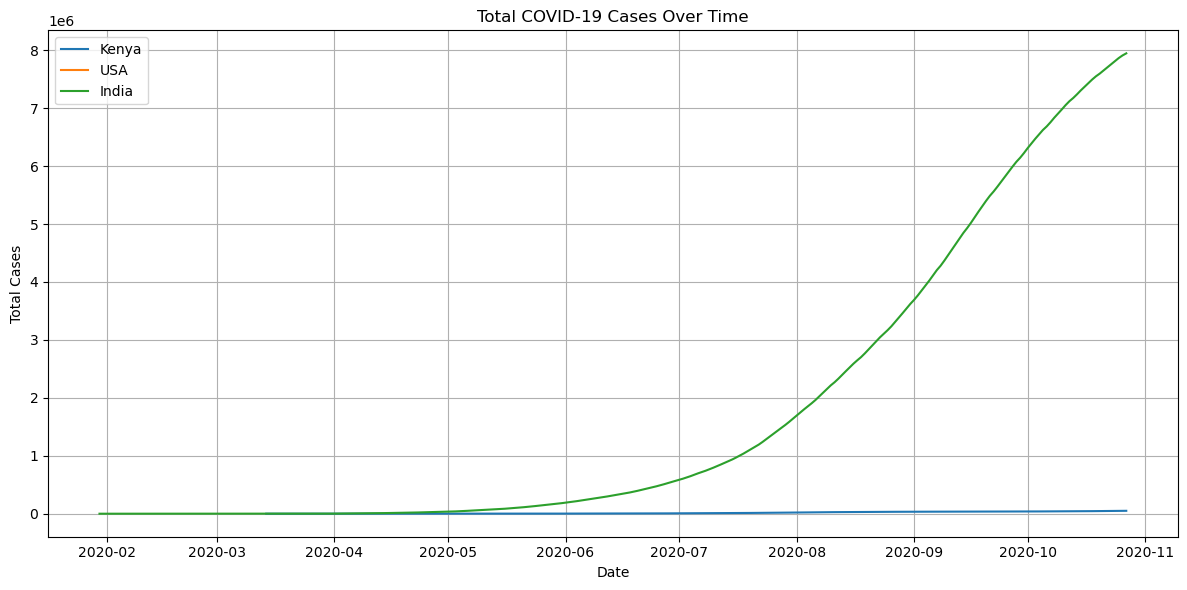

In [6]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


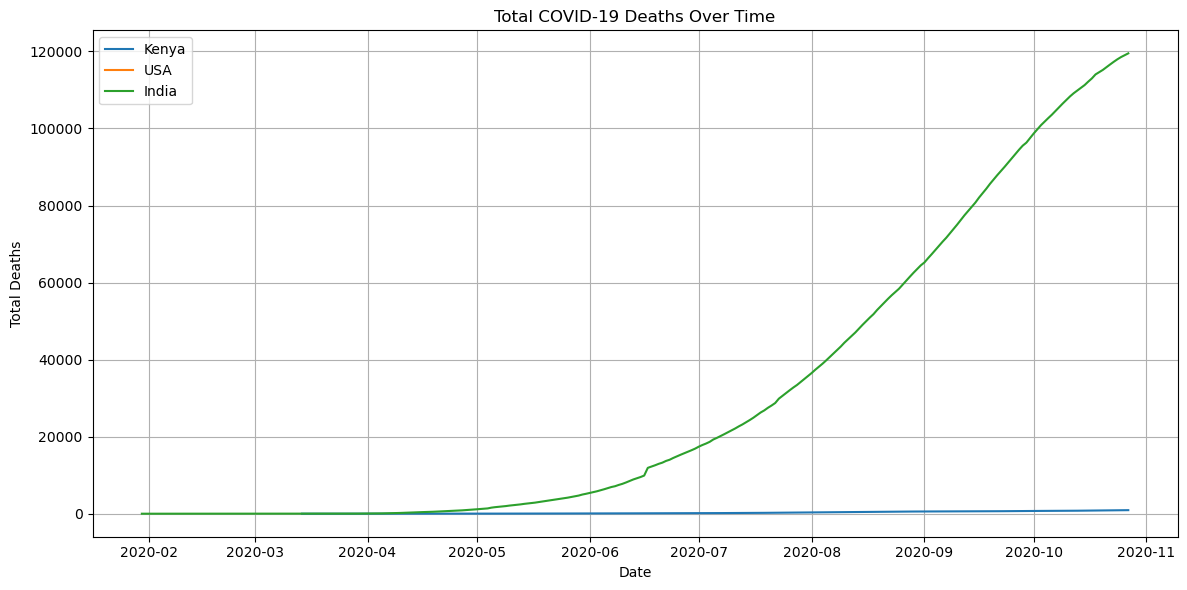

In [7]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


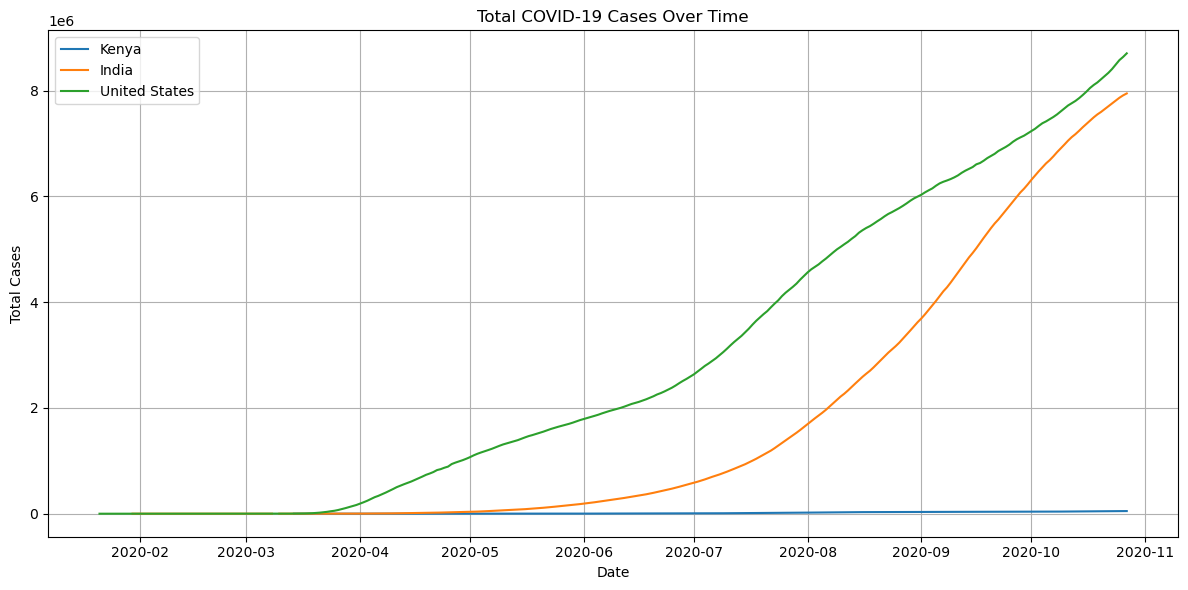

In [10]:
plt.figure(figsize=(12, 6))
# List of countries
countries = ['Kenya', 'India', 'United States']
# Filter data for selected countries
df_filtered = df[df['location'].isin(countries)]
# Plot total cases over time
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(pd.to_datetime(country_data['date']), country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

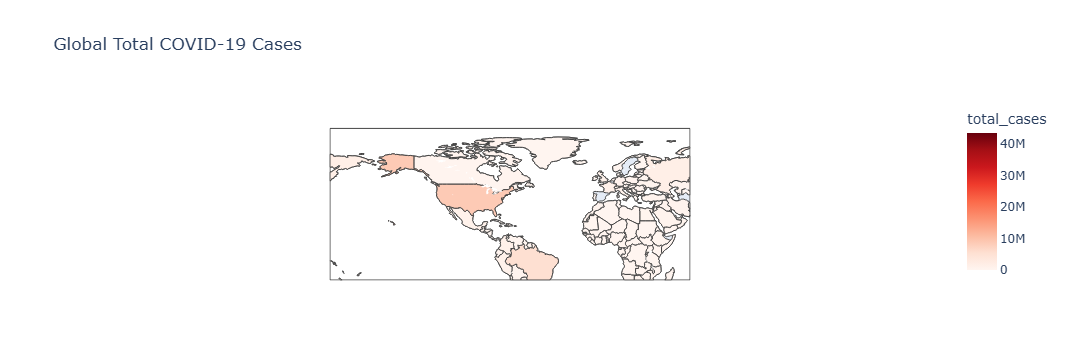

In [14]:
# Get latest data
latest = df[df['date'] == df['date'].max()]

fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title="Global Total COVID-19 Cases")
fig.show()


## Key Insights
- India had a major surge in May 2021.
- The USA had the fastest early vaccination rollout.
- Kenya’s case count remained lower than other regions, possibly due to underreporting.
